In [1]:
!git clone https://github.com/shreyjain711/wm-tango.git

fatal: destination path 'wm-tango' already exists and is not an empty directory.


In [2]:
%cd '/home/ec2-user/SageMaker/wm-tango'
!pwd

/home/ec2-user/SageMaker/wm-tango
/home/ec2-user/SageMaker/wm-tango


In [3]:
!git pull

Already up to date.


In [4]:
!pip install setuptools==70.3.0
!pip install -r requirements.txt --quiet
!pip install jax==0.4.23 --quiet
!pip install jaxlib==0.4.23 --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.4.23 requires scipy>=1.9, but you have scipy 1.8.0 which is incompatible.
jaxlib 0.4.23 requires scipy>=1.9, but you have scipy 1.8.0 which is incompatible.


In [5]:
# # Environmental Sounds



import IPython
import soundfile as sf
from tango import Tango

tango = Tango("declare-lab/tango2")


prompt = 'Birds chirping in a dense forest at sunrise'
audio1, init_latents = tango.generate(prompt, wm_flag=True)
sf.write(f"wm_p{p_num}.wav", audio1, samplerate=16000)


Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

/home/ec2-user/SageMaker/wm-tango/audioldm/audio/stft.py:42: FutureWarning: Pass size=1024 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  fft_window = pad_center(fft_window, filter_length)
/home/ec2-user/SageMaker/wm-tango/audioldm/audio/stft.py:151: FutureWarning: Pass sr=16000, n_fft=1024, n_mels=64, fmin=0, fmax=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_basis = librosa_mel_fn(


UNet initialized randomly.


Some weights of the model checkpoint at google/flan-t5-large were not used when initializing T5EncoderModel: ['decoder.block.18.layer.1.EncDecAttention.v.weight', 'decoder.block.6.layer.0.SelfAttention.k.weight', 'decoder.block.19.layer.1.EncDecAttention.v.weight', 'decoder.block.13.layer.1.EncDecAttention.k.weight', 'decoder.block.2.layer.0.layer_norm.weight', 'decoder.block.5.layer.0.layer_norm.weight', 'decoder.block.14.layer.2.layer_norm.weight', 'decoder.block.16.layer.1.EncDecAttention.v.weight', 'decoder.block.17.layer.1.EncDecAttention.k.weight', 'decoder.block.20.layer.0.SelfAttention.v.weight', 'decoder.block.17.layer.1.layer_norm.weight', 'decoder.block.8.layer.2.DenseReluDense.wi_0.weight', 'decoder.block.8.layer.2.DenseReluDense.wi_1.weight', 'decoder.block.20.layer.1.EncDecAttention.k.weight', 'decoder.block.0.layer.0.SelfAttention.q.weight', 'decoder.block.19.layer.0.SelfAttention.q.weight', 'decoder.block.18.layer.0.SelfAttention.q.weight', 'decoder.block.9.layer.0.Self

Successfully loaded checkpoint from: declare-lab/tango2
DBG torch.Size([1, 8, 256, 16])


In [9]:
init_latents

tensor([[[[ 1.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          ...,
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

         [[ 1.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          ...,
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

         [[ 1.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  

In [6]:
# import torch
# import numpy as np

# # Assuming necessary imports and initializations
# batch_size = 1
# audio_shape = (1, 1, 16000)  # Adjust based on TANGO's expected input shape
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# # Original noise
# noise = torch.randn(batch_size, *audio_shape, device=device)

# # Perform FFT
# F_noise = torch.fft.fft(noise)

# # Create a mask for the watermark (define create_watermark_mask accordingly)
# def create_watermark_mask(shape):
#     mask = torch.zeros(shape, dtype=torch.bool)
#     # Example: Set mask for specific frequency bands
#     mask[..., 100:200] = True
#     return mask

# mask = create_watermark_mask(F_noise.shape)

# # Define the watermark pattern
# watermark_pattern = torch.rand(mask.sum(), device=device)

# # Embed the watermark
# F_noise[mask] = watermark_pattern

# # Inverse FFT to get the watermarked noise
# watermarked_noise = torch.fft.ifft(F_noise).real


In [7]:
# In TANGO's generation code
# Original noise initialization
# noise = torch.randn(batch_size, *audio_shape, device=device)

# Use watermarked noise instead
# noise = watermarked_noise


In [5]:
# import json
# import torch
# from tqdm import tqdm
# from huggingface_hub import snapshot_download
# from models import AudioDiffusion, DDPMScheduler
# from audioldm.audio.stft import TacotronSTFT
# from audioldm.variational_autoencoder import AutoencoderKL


# class AudioDiffusionInversion:
#     def __init__(self, name="declare-lab/tango", device="cuda:0"):
        
#         self.device = device
        
#         path = snapshot_download(repo_id=name)
        
#         vae_config = json.load(open("{}/vae_config.json".format(path)))
#         stft_config = json.load(open("{}/stft_config.json".format(path)))
#         main_config = json.load(open("{}/main_config.json".format(path)))
        
#         self.vae = AutoencoderKL(**vae_config).to(device)
#         self.stft = TacotronSTFT(**stft_config).to(device)
#         self.model = AudioDiffusion(**main_config).to(device)
        
#         vae_weights = torch.load("{}/pytorch_model_vae.bin".format(path), map_location=device)
#         stft_weights = torch.load("{}/pytorch_model_stft.bin".format(path), map_location=device)
#         main_weights = torch.load("{}/pytorch_model_main.bin".format(path), map_location=device)
        
#         self.vae.load_state_dict(vae_weights)
#         self.stft.load_state_dict(stft_weights)
#         self.model.load_state_dict(main_weights)

#         print ("Successfully loaded checkpoint from:", name)
        
#         self.vae.eval()
#         self.stft.eval()
#         self.model.eval()
        
#         self.scheduler = DDPMScheduler.from_pretrained(main_config["scheduler_name"], subfolder="scheduler")
        

#     @torch.no_grad()
#     def get_latents_from_audio(self, audio_waveform):
#         """
#         Encodes audio into latents using STFT and VAE.
#         :param audio_waveform: Input waveform to encode.
#         :return: Latent representation of the audio.
#         """
#         mel_spectrogram, _, _ = self.stft.mel_spectrogram(audio_waveform.unsqueeze(0).to(self.device))
#         latents = self.vae.encode_first_stage(mel_spectrogram.unsqueeze(0)).sample()
#         return latents
    
    



#     @torch.no_grad()
#     def backward_diffusion(self, latents, num_inference_steps=50, encoder_hidden_states=None):
#         self.scheduler.set_timesteps(num_inference_steps, device=latents.device)
#         timesteps = self.scheduler.timesteps

#         for t in tqdm(reversed(timesteps), desc="Reversing Diffusion"):
#             alpha_prod_t = self.scheduler.alphas_cumprod[t]
#             beta_prod_t = 1 - alpha_prod_t

#             print(f"Timestep {t}: alpha_prod_t={alpha_prod_t}, beta_prod_t={beta_prod_t}")

#             noise_pred = self.model.unet(latents, t, encoder_hidden_states=encoder_hidden_states).sample

#             print(f"Timestep {t}: noise_pred min={noise_pred.min()}, max={noise_pred.max()}")
#             latents = (
#                 (latents - beta_prod_t.sqrt() * noise_pred)  # Remove predicted noise
#                 / (alpha_prod_t.sqrt() + 1e-7)  # Add small epsilon for stability
#             )

#             print(f"Timestep {t}: latents min={latents.min()}, max={latents.max()}")
#         return latents

# #     def backward_diffusion(self, latents, num_inference_steps=50, encoder_hidden_states = None):
# #         """
# #         Performs the backward diffusion process to reconstruct noise.

# #         :param latents: Initial latent variables (e.g., generated from a VAE or forward diffusion process).
# #         :param num_inference_steps: Number of diffusion steps to reverse the process.
# #         :return: Reconstructed latents representing the noise.
# #         """
# #         # Set up the scheduler for backward diffusion
# #         self.scheduler.set_timesteps(num_inference_steps, device=latents.device)  # Use self.scheduler here
# #         timesteps = self.scheduler.timesteps

# #         # Start the reverse diffusion process
# #         for t in tqdm(reversed(timesteps), desc="Reversing Diffusion"):
# #             # Current alpha value
# #             alpha_prod_t = self.scheduler.alphas_cumprod[t]
# #             beta_prod_t = 1 - alpha_prod_t

# #             # Predict the noise added at this step
# #             print(f"UNET CONFIGURATION {self.model.unet.config}")
# #             print(f"[DEBUG] UNet Input Channels: {self.model.unet.config.in_channels}")

# #             noise_pred = self.model.unet(
# #     latents, t, encoder_hidden_states=encoder_hidden_states
# # ).sample



# #             # Update the latents to the previous step
# #             latents = (
# #                 (latents - beta_prod_t.sqrt() * noise_pred)  # Remove predicted noise
# #                 / alpha_prod_t.sqrt()  # Scale by alpha
# #             )

# #         return latents
    

#     @torch.no_grad()
#     def reconstruct_audio(self, latents):
#         """
#         Reconstructs audio waveform from latents.
#         :param latents: Latent variables.
#         :return: Reconstructed audio waveform.
#         """
#         mel_spectrogram = self.vae.decode_first_stage(latents)
#         audio_waveform = self.vae.decode_to_waveform(mel_spectrogram)
#         return audio_waveform

# #     def invert(self, audio_waveform, num_inference_steps=50):
# #         """
# #         Inverts an audio waveform through the diffusion pipeline.
# #         :param audio_waveform: Input waveform to invert.
# #         :param stft: STFT processor.
# #         :param num_inference_steps: Number of diffusion steps.
# #         :return: Reconstructed waveform and initial noise.
# #         """
# #         latents = self.get_latents_from_audio(audio_waveform)#.transpose(-3, -2)
# #         print("Latents shape: ", latents.shape)
# #         noise_latents = self.backward_diffusion(latents, num_inference_steps=num_inference_steps)
# # #         reconstructed_waveform = self.reconstruct_audio(latents)
# #         return noise_latents

#     def invert(self, audio_waveform, prompt=None, num_inference_steps=50):
#         """
#         Inverts an audio waveform through the diffusion pipeline.
#         :param audio_waveform: Input waveform to invert.
#         :param prompt: Optional text prompt for conditional inversion.
#         :param num_inference_steps: Number of diffusion steps.
#         :return: Reconstructed waveform and initial noise.
#         """
#         # Get latents from the input audio
#         latents = self.get_latents_from_audio(audio_waveform)
# #         print("DBG", latents.shape)

#         # Encode text if prompt is provided, else set to zero (unconditional)
#         if prompt:
#             encoder_hidden_states, boolean_encoder_mask = self.model.encode_text(prompt)
#         else:
#             # Unconditional mode: Set encoder_hidden_states to zeros
#             encoder_hidden_states = torch.zeros(
#                 (1, 1, self.model.unet.config.cross_attention_dim),
#                 device=latents.device
#             )
#             boolean_encoder_mask = None

#         # Perform the reverse diffusion process
#         noise_latents = self.backward_diffusion(
#             latents,
#             num_inference_steps=num_inference_steps,
#             encoder_hidden_states=encoder_hidden_states
#         )

#         return noise_latents


# # Example Usage:
# # Initialize your model, scheduler, and STFT processor.
# # Initialize your model, scheduler, and STFT processor.
# # tango = Tango(name="declare-lab/tango")

# import numpy as np
# import librosa
# import matplotlib.pyplot as plt
# from scipy.spatial.distance import euclidean


# def load_audio(file_path):
#     """Load audio file using librosa."""
#     audio, sr = librosa.load(file_path, sr=None)  # Load audio with native sampling rate
#     return audio, sr

# inversion_pipeline = AudioDiffusionInversion()

Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

/home/ec2-user/SageMaker/wm-tango/audioldm/audio/stft.py:42: FutureWarning: Pass size=1024 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  fft_window = pad_center(fft_window, filter_length)
/home/ec2-user/SageMaker/wm-tango/audioldm/audio/stft.py:151: FutureWarning: Pass sr=16000, n_fft=1024, n_mels=64, fmin=0, fmax=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_basis = librosa_mel_fn(


UNet initialized randomly.


Some weights of the model checkpoint at google/flan-t5-large were not used when initializing T5EncoderModel: ['decoder.block.14.layer.1.EncDecAttention.v.weight', 'decoder.block.19.layer.0.SelfAttention.k.weight', 'decoder.block.1.layer.2.DenseReluDense.wo.weight', 'decoder.block.15.layer.1.layer_norm.weight', 'decoder.block.19.layer.2.DenseReluDense.wo.weight', 'decoder.block.4.layer.2.layer_norm.weight', 'decoder.block.13.layer.2.DenseReluDense.wi_1.weight', 'decoder.block.1.layer.1.EncDecAttention.q.weight', 'decoder.block.17.layer.2.layer_norm.weight', 'decoder.block.19.layer.0.SelfAttention.o.weight', 'decoder.block.10.layer.0.SelfAttention.v.weight', 'decoder.block.21.layer.0.SelfAttention.o.weight', 'decoder.block.5.layer.0.SelfAttention.o.weight', 'decoder.block.19.layer.0.SelfAttention.q.weight', 'decoder.block.2.layer.1.layer_norm.weight', 'decoder.block.8.layer.2.DenseReluDense.wi_0.weight', 'decoder.block.22.layer.0.SelfAttention.v.weight', 'decoder.block.4.layer.1.EncDecAt

Successfully loaded checkpoint from: declare-lab/tango


In [5]:
import json
import torch
from tqdm import tqdm
from huggingface_hub import snapshot_download
from models import AudioDiffusion, DDPMScheduler
from audioldm.audio.stft import TacotronSTFT
from audioldm.variational_autoencoder import AutoencoderKL


class AudioDiffusionInversion:
    def __init__(self, name="declare-lab/tango", device="cuda:0"):
        self.device = device

        # Load model configurations and weights
        path = snapshot_download(repo_id=name)
        vae_config = json.load(open(f"{path}/vae_config.json"))
        stft_config = json.load(open(f"{path}/stft_config.json"))
        main_config = json.load(open(f"{path}/main_config.json"))

        self.vae = AutoencoderKL(**vae_config).to(device)
        self.stft = TacotronSTFT(**stft_config).to(device)
        self.model = AudioDiffusion(**main_config).to(device)

        self.vae.load_state_dict(torch.load(f"{path}/pytorch_model_vae.bin", map_location=device))
        self.stft.load_state_dict(torch.load(f"{path}/pytorch_model_stft.bin", map_location=device))
        self.model.load_state_dict(torch.load(f"{path}/pytorch_model_main.bin", map_location=device))

        print(f"Successfully loaded checkpoint from: {name}")

        self.vae.eval()
        self.stft.eval()
        self.model.eval()

        self.scheduler = DDPMScheduler.from_pretrained(main_config["scheduler_name"], subfolder="scheduler")

    @torch.no_grad()
    def get_latents_from_audio(self, audio_waveform):
        """
        Encodes audio into latents using STFT and VAE.
        """
        mel_spectrogram, _, _ = self.stft.mel_spectrogram(audio_waveform.unsqueeze(0).to(self.device))
        latents = self.vae.encode_first_stage(mel_spectrogram.unsqueeze(0)).sample()
        return latents

    @staticmethod
    def backward_ddim(x_t, alpha_t, alpha_tm1, eps_xt):
        """
        Reconstructs x_{t-1} from x_t using DDIM-style inversion.
        """
        return (
            alpha_tm1**0.5
            * (
                (alpha_t**-0.5 - alpha_tm1**-0.5) * x_t
                + ((1 / alpha_tm1 - 1) ** 0.5 - (1 / alpha_t - 1) ** 0.5) * eps_xt
            )
            + x_t
        )

    @torch.no_grad()
    def backward_diffusion(self, latents, encoder_hidden_states, num_inference_steps=50, guidance_scale=7.5):
        """
        Perform backward diffusion to invert latents to noise.
        """
        # Initialize scheduler and scale latents with noise sigma
        self.scheduler.set_timesteps(num_inference_steps, device=self.device)
        latents = latents * self.scheduler.init_noise_sigma

        for t in reversed(self.scheduler.timesteps):
            # Expand for classifier-free guidance
            if guidance_scale > 1.0:
                latent_model_input = torch.cat([latents] * 2)
            else:
                latent_model_input = latents

            latent_model_input = self.scheduler.scale_model_input(latent_model_input, t)

            # Predict noise residual
            noise_pred = self.model.unet(
                latent_model_input, t, encoder_hidden_states=encoder_hidden_states
            ).sample

            # Classifier-free guidance
            if guidance_scale > 1.0:
                noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
                noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text - noise_pred_uncond)

            # Calculate alpha values for DDIM update
            alpha_t = self.scheduler.alphas_cumprod[t]
            alpha_tm1 = (
                self.scheduler.alphas_cumprod[t - 1]
                if t > 0
                else self.scheduler.final_alpha_cumprod
            )

            # Apply backward DDIM step
            latents = self.backward_ddim(
                x_t=latents,
                alpha_t=alpha_t,
                alpha_tm1=alpha_tm1,
                eps_xt=noise_pred,
            )

        return latents

    @torch.no_grad()
    def reconstruct_audio(self, latents):
        """
        Reconstructs audio waveform from latents.
        """
        mel_spectrogram = self.vae.decode_first_stage(latents)
        audio_waveform = self.vae.decode_to_waveform(mel_spectrogram)
        return audio_waveform

    def invert(self, audio_waveform, prompt=None, num_inference_steps=50, guidance_scale=7.5):
        """
        Inverts an audio waveform through the diffusion pipeline.
        """
        # Get latents from the input audio
        latents = self.get_latents_from_audio(audio_waveform)

        # Get text embeddings if prompt is provided
        if prompt:
            encoder_hidden_states = self.model.encode_text(prompt)
        else:
            # Unconditional mode
            encoder_hidden_states = torch.zeros(
                (1, 1, self.model.unet.config.cross_attention_dim), device=self.device
            )

        # Perform the reverse diffusion process
        noise_latents = self.backward_diffusion(
            latents,
            encoder_hidden_states=encoder_hidden_states,
            num_inference_steps=num_inference_steps,
            guidance_scale=guidance_scale,
        )

        return noise_latents


def load_audio(file_path):
    """Load audio file using librosa."""
    import librosa
    audio, sr = librosa.load(file_path, sr=None)  # Load audio with native sampling rate
    return audio, sr


# Initialize the inversion pipeline
inversion_pipeline = AudioDiffusionInversion()


Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

/home/ec2-user/SageMaker/wm-tango/audioldm/audio/stft.py:42: FutureWarning: Pass size=1024 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  fft_window = pad_center(fft_window, filter_length)
/home/ec2-user/SageMaker/wm-tango/audioldm/audio/stft.py:151: FutureWarning: Pass sr=16000, n_fft=1024, n_mels=64, fmin=0, fmax=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_basis = librosa_mel_fn(


UNet initialized randomly.


Some weights of the model checkpoint at google/flan-t5-large were not used when initializing T5EncoderModel: ['decoder.block.11.layer.2.DenseReluDense.wi_0.weight', 'decoder.block.17.layer.0.SelfAttention.o.weight', 'decoder.block.3.layer.2.layer_norm.weight', 'decoder.block.8.layer.1.layer_norm.weight', 'decoder.block.21.layer.2.DenseReluDense.wi_1.weight', 'decoder.block.18.layer.0.SelfAttention.k.weight', 'decoder.block.18.layer.0.SelfAttention.o.weight', 'decoder.block.5.layer.0.SelfAttention.o.weight', 'decoder.block.23.layer.1.EncDecAttention.o.weight', 'decoder.block.2.layer.1.layer_norm.weight', 'decoder.block.5.layer.0.layer_norm.weight', 'decoder.block.20.layer.0.layer_norm.weight', 'decoder.block.15.layer.1.EncDecAttention.o.weight', 'decoder.block.23.layer.2.DenseReluDense.wi_0.weight', 'decoder.block.8.layer.0.SelfAttention.o.weight', 'decoder.block.11.layer.1.EncDecAttention.k.weight', 'decoder.block.16.layer.0.SelfAttention.v.weight', 'decoder.block.3.layer.0.SelfAttenti

Successfully loaded checkpoint from: declare-lab/tango


In [6]:
waveform, sr = load_audio('generated_samples/wm_p1_n1_c7.wav') 
waveform = torch.tensor(waveform)
prompt= 'Birds chirping in a dense forest at sunrise'
noise = inversion_pipeline.invert(waveform, prompt = prompt, num_inference_steps=100)
reconstructed_waveform = inversion_pipeline.reconstruct_audio(noise)


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:4                                                                                    │
│                                                                                                  │
│   1 waveform, sr = load_audio('generated_samples/wm_p1_n1_c7.wav')                               │
│   2 waveform = torch.tensor(waveform)                                                            │
│   3 prompt= 'Birds chirping in a dense forest at sunrise'                                        │
│ ❱ 4 noise = inversion_pipeline.invert(waveform, prompt = prompt, num_inference_steps=100)        │
│   5 reconstructed_waveform = inversion_pipeline.reconstruct_audio(noise)                         │
│   6                                                                                              │
│                                                                                                  │
│ in invert:131                                                                                    │
│                                                                                                  │
│   128 │   │   │   )                                                                              │
│   129 │   │                                                                                      │
│   130 │   │   # Perform the reverse diffusion process                                            │
│ ❱ 131 │   │   noise_latents = self.backward_diffusion(                                           │
│   132 │   │   │   latents,                                                                       │
│   133 │   │   │   encoder_hidden_states=encoder_hidden_states,                                   │
│   134 │   │   │   num_inference_steps=num_inference_steps,                                       │
│                                                                                                  │
│ /home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/torch/autograd/grad_mode.py:2 │
│ 7 in decorate_context                                                                            │
│                                                                                                  │
│    24 │   │   @functools.wraps(func)                                                             │
│    25 │   │   def decorate_context(*args, **kwargs):                                             │
│    26 │   │   │   with self.clone():                                                             │
│ ❱  27 │   │   │   │   return func(*args, **kwargs)                                               │
│    28 │   │   return cast(F, decorate_context)                                                   │
│    29 │                                                                                          │
│    30 │   def _wrap_generator(self, func):                                                       │
│                                                                                                  │
│ in backward_diffusion:78                                                                         │
│                                                                                                  │
│    75 │   │   │   latent_model_input = self.scheduler.scale_model_input(latent_model_input, t)   │
│    76 │   │   │                                                                                  │
│    77 │   │   │   # Predict noise residual                                                       │
│ ❱  78 │   │   │   noise_pred = self.model.unet(                                                  │
│    79 │   │   │   │   latent_model_input, t, encoder_hidden_states=encoder_hidden_states         │
│    80 │   │   │   ).sample                                                                       │
│    81                                                      

In [ ]:
import matplotlib.pyplot as plt
import torch

# Assuming `noise_tensor` is your output tensor
noise_tensor = noise  # Replace with your tensor variable

# Squeeze the batch dimension if it's 1 (shape: [batch, channels, height, width])
if noise_tensor.shape[0] == 1:
    noise_tensor = noise_tensor.squeeze(0)

# Select a channel to visualize
channel_index = 7  # Change to visualize different channels
channel_data = noise_tensor[channel_index].detach().cpu().numpy()  # Convert to NumPy for plotting

# Normalize the data for visualization
# channel_data = (channel_data - channel_data.min()) / (channel_data.max() - channel_data.min())

# Plot the selected channel
plt.figure(figsize=(10, 5))
plt.imshow(channel_data, cmap='viridis')  # Change cmap if needed
plt.colorbar()
plt.title(f"Channel {channel_index}")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import torch

# Assuming `noise_tensor` is your output tensor
noise_tensor = noise  # Replace with your tensor variable

# Squeeze the batch dimension if it's 1 (shape: [batch, channels, height, width])
if noise_tensor.shape[0] == 1:
    noise_tensor = noise_tensor.squeeze(0)

# Select a channel to visualize
channel_index = 6  # Change to visualize different channels
channel_data = noise_tensor[channel_index].detach().cpu().numpy()  # Convert to NumPy for plotting

# Normalize the data for visualization
# channel_data = (channel_data - channel_data.min()) / (channel_data.max() - channel_data.min())

# Plot the selected channel
plt.figure(figsize=(10, 5))
plt.imshow(channel_data, cmap='viridis')  # Change cmap if needed
plt.colorbar()
plt.title(f"Channel {channel_index}")
plt.show()


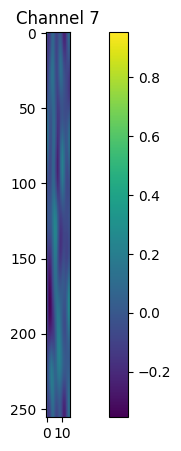

In [13]:
import matplotlib.pyplot as plt
import torch

# Assuming `noise_tensor` is your output tensor
noise_tensor = init_latents  # Replace with your tensor variable

# Squeeze the batch dimension if it's 1 (shape: [batch, channels, height, width])
if noise_tensor.shape[0] == 1:
    noise_tensor = noise_tensor.squeeze(0)

# Select a channel to visualize
channel_index = 7  # Change to visualize different channels
channel_data = noise_tensor[channel_index].detach().cpu().numpy()  # Convert to NumPy for plotting

# Normalize the data for visualization
# channel_data = (channel_data - channel_data.min()) / (channel_data.max() - channel_data.min())

# Plot the selected channel
plt.figure(figsize=(10, 5))
plt.imshow(channel_data, cmap='viridis')  # Change cmap if needed
plt.colorbar()
plt.title(f"Channel {channel_index}")
plt.show()


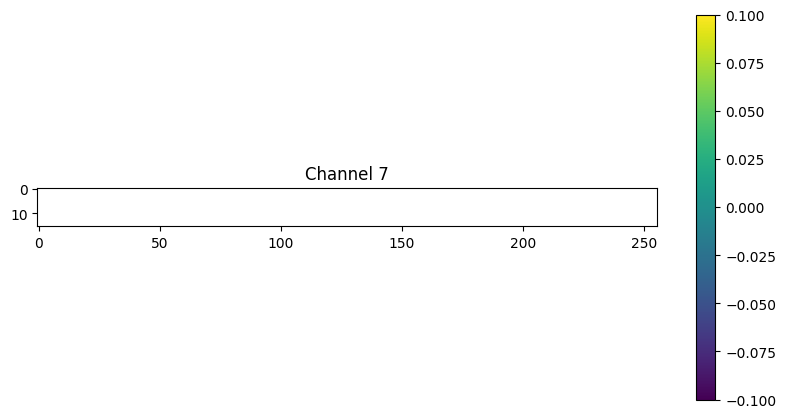

In [8]:
import matplotlib.pyplot as plt
import torch

# Assuming `noise_tensor` is your output tensor
noise_tensor = noise  # Replace with your tensor variable

# Squeeze the batch dimension if it's 1 (shape: [batch, channels, height, width])
if noise_tensor.shape[0] == 1:
    noise_tensor = noise_tensor.squeeze(0)

# Select a channel to visualize
channel_index = 7  # Change to visualize different channels
channel_data = noise_tensor[channel_index].detach().cpu().numpy()  # Convert to NumPy for plotting

# Normalize the data for visualization
# channel_data = (channel_data - channel_data.min()) / (channel_data.max() - channel_data.min())

# Plot the selected channel
plt.figure(figsize=(10, 5))
plt.imshow(channel_data, cmap='viridis')  # Change cmap if needed
plt.colorbar()
plt.title(f"Channel {channel_index}")
plt.show()


In [9]:
noise

tensor([[[[nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          ...,
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan]],

         [[nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          ...,
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan]],

         [[nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          ...,
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan]],

         ...,

         [[nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, n